In [ ]:
# https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [11]:
# create random data and generate a 2d gaussian for test

# standardize the data

# compute the covariance matrix

# compute the eigenvectors and eigenvalues

# sort the eigenvectors by decreasing eigenvalues

# choose the k eigenvectors that correspond to the k largest eigenvalues where k is the dimensionality of the new feature space (k ≤ d)

# project the data onto the new feature subspace

/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_64489/3170063011.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mu, sigma, 1000)


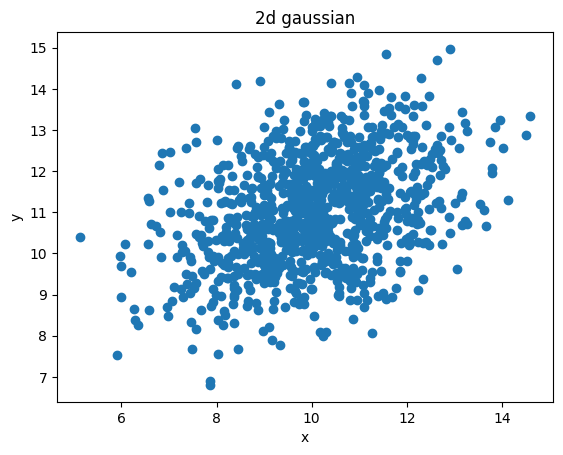

In [14]:
# 2d gaussian

mu = np.array([10, 11])
sigma = np.array([[1.3, 2.0], [2.0, 0.3]])

np.random.seed(0)
X = np.random.multivariate_normal(mu, sigma, 1000)

plt.scatter(X[:, 0], X[:, 1])
plt.title('2d gaussian')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

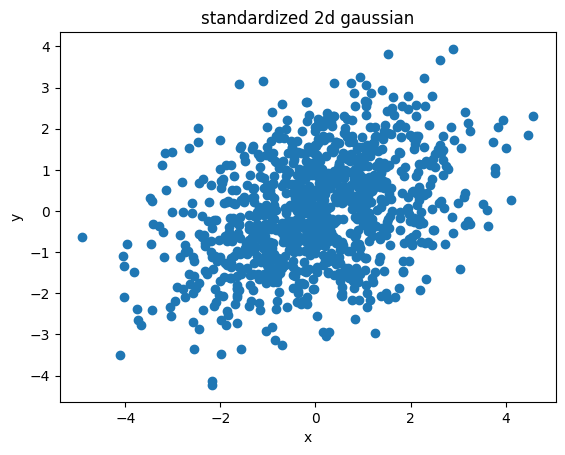

In [45]:
# standardize the data

X_norm = (X - X.mean(axis=0))#/X.std(axis=0)

plt.scatter(X_norm[:, 0], X_norm[:, 1])
plt.title('standardized 2d gaussian')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [46]:
# compute the covariance matrix
cov = np.round(np.cov(X_norm.T), 2)


In [47]:
# compute the eigenvectors and eigenvalues

eig_vals, eig_vecs = np.linalg.eig(cov)

print(eig_vals)
print(eig_vecs)

[2.72 1.22]
[[ 0.8 -0.6]
 [ 0.6  0.8]]


In [48]:
# sort the eigenvectors by decreasing eigenvalues

indicies = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[indicies]
eig_vecs = eig_vecs[:,indicies]

In [49]:
explained_variance = eig_vals/sum(eig_vals)
explained_variance

array([0.69035533, 0.30964467])

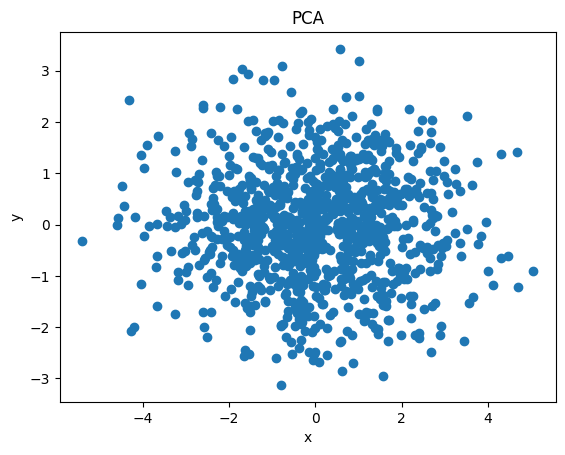

In [50]:
# calculate the principal components

pca_data = np.dot(X_norm, eig_vecs)

plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('PCA')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

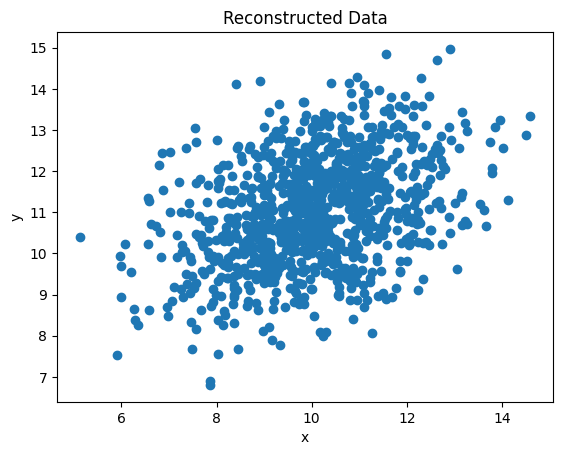

In [52]:
# reconstruct the data

X_reconstructed = np.dot(pca_data, eig_vecs.T) + X.mean(axis=0)

plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1])
plt.title('Reconstructed Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [53]:
# reconstruction loss

loss = np.sum((X - X_reconstructed)**2)
print(loss)

5.5220263365470826e-30
